## Data Mining | W5 - Class Exercise
Sharon Tan - 0706022310024

In [1]:
# import library
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree

In [2]:
# load dataset
pd.set_option('display.max_columns', None) # Display all columns

url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/exercise_employee_attrition.csv"
df = pd.read_csv(url)
df.head()

,Employee_ID,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked,Attrition
0,1,58,Female,Married,IT,Manager,1,15488,28,15,4,2,1,3,4,14,No,6,54,17,4,4,4,20,3,No
1,2,48,Female,Married,Sales,Assistant,5,13079,28,6,9,1,2,1,1,6,Yes,2,45,1,4,1,2,25,2,No
2,3,34,Male,Married,Marketing,Assistant,1,13744,24,24,14,8,3,2,1,77,Yes,6,34,2,3,4,4,45,3,No
3,4,27,Female,Divorced,Marketing,Manager,1,6809,26,10,8,2,3,5,4,49,No,9,48,18,2,3,1,35,3,No
4,5,40,Male,Divorced,Marketing,Executive,1,10206,52,29,10,1,2,5,1,64,No,3,33,0,4,1,3,44,3,No


In [3]:
# get info from dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Employee_ID                    1000 non-null   int64 
 1   Age                            1000 non-null   int64 
 2   Gender                         1000 non-null   object
 3   Marital_Status                 1000 non-null   object
 4   Department                     1000 non-null   object
 5   Job_Role                       1000 non-null   object
 6   Job_Level                      1000 non-null   int64 
 7   Monthly_Income                 1000 non-null   int64 
 8   Hourly_Rate                    1000 non-null   int64 
 9   Years_at_Company               1000 non-null   int64 
 10  Years_in_Current_Role          1000 non-null   int64 
 11  Years_Since_Last_Promotion     1000 non-null   int64 
 12  Work_Life_Balance              1000 non-null   int64 
 13  Job_

In [4]:
# get statistical info from dataset
df.describe()

,Employee_ID,Age,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,39.991000,3.055000,11499.899000,57.837000,14.922000,7.539000,4.40800,2.495000,3.151000,2.52700,50.043000,4.877000,44.553000,9.524000,2.494000,2.519000,2.503000,24.507000,2.484000
std,288.819436,11.780055,1.399977,4920.529231,24.702037,8.350548,4.001061,2.99508,1.105077,1.426967,1.13073,28.204657,2.546833,8.704192,5.973534,1.110494,1.106736,1.099636,14.138099,1.111296
min,1.000000,20.000000,1.000000,3001.000000,15.000000,1.000000,1.000000,0.00000,1.000000,1.000000,1.00000,0.000000,1.000000,30.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,250.750000,30.000000,2.000000,7395.750000,36.000000,8.000000,4.000000,2.00000,2.000000,2.000000,2.00000,26.000000,3.000000,37.000000,4.000000,2.000000,2.000000,2.000000,12.000000,1.000000
50%,500.500000,41.000000,3.000000,11256.000000,58.000000,15.000000,8.000000,4.00000,3.000000,3.000000,3.00000,50.000000,5.000000,45.000000,9.000000,2.000000,3.000000,3.000000,24.000000,2.000000
75%,750.250000,50.250000,4.000000,15855.000000,80.000000,22.000000,11.000000,7.00000,3.000000,4.000000,4.00000,75.250000,7.000000,52.000000,15.000000,4.000000,4.000000,3.000000,37.000000,3.000000
max,1000.000000,59.000000,5.000000,19999.000000,99.000000,29.000000,14.000000,9.00000,4.000000,5.000000,4.00000,99.000000,9.000000,59.000000,19.000000,4.000000,4.000000,4.000000,49.000000,4.000000


# Preprocessing

In [5]:
# show unique values from dataset
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'Employee_ID': array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
          12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
          23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
          34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
          45,   46,   47,   48,   49,   50,   51,   52,   53,   54,   55,
          56,   57,   58,   59,   60,   61,   62,   63,   64,   65,   66,
          67,   68,   69,   70,   71,   72,   73,   74,   75,   76,   77,
          78,   79,   80,   81,   82,   83,   84,   85,   86,   87,   88,
          89,   90,   91,   92,   93,   94,   95,   96,   97,   98,   99,
         100,  101,  102,  103,  104,  105,  106,  107,  108,  109,  110,
         111,  112,  113,  114,  115,  116,  117,  118,  119,  120,  121,
         122,  123,  124,  125,  126,  127,  128,  129,  130,  131,  132,
         133,  134,  135,  136,  137,  138,  139,  140,  141,  142,  143,
         144,  145,  14

In [6]:
# Drop Employee_ID as it only Identifier

df = df.drop(columns=['Employee_ID'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Age                            1000 non-null   int64 
 1   Gender                         1000 non-null   object
 2   Marital_Status                 1000 non-null   object
 3   Department                     1000 non-null   object
 4   Job_Role                       1000 non-null   object
 5   Job_Level                      1000 non-null   int64 
 6   Monthly_Income                 1000 non-null   int64 
 7   Hourly_Rate                    1000 non-null   int64 
 8   Years_at_Company               1000 non-null   int64 
 9   Years_in_Current_Role          1000 non-null   int64 
 10  Years_Since_Last_Promotion     1000 non-null   int64 
 11  Work_Life_Balance              1000 non-null   int64 
 12  Job_Satisfaction               1000 non-null   int64 
 13  Perf

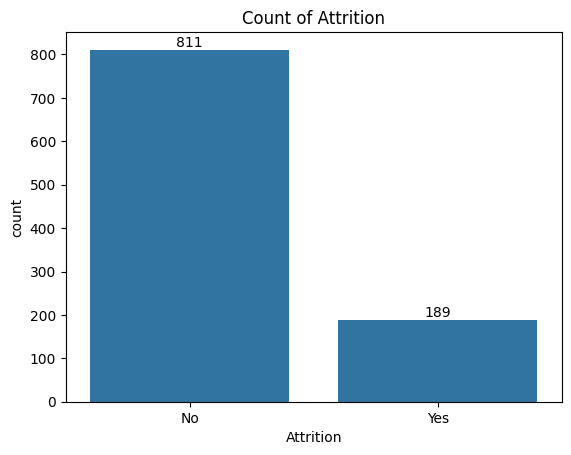

In [7]:
# show how many attrition
ax = sns.countplot(data=df, x='Attrition')
plt.title('Count of Attrition')

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container)
plt.show()

The attrition data show a class imbalance between the two target categories:
- “No”: 811 records
- “Yes”: 189 records

We can see that the dataset is very imbalance between the two classes.

# Feature Encoding

In [8]:
# duplicate df
df_encoded = df.copy()

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# 1. One-Hot Encoding
# Columns: Attrition, Gender, OverTime

one_hot_map = {
    'Attrition': {'No': 0, 'Yes': 1},
    'Gender': {'Female': 0, 'Male': 1},
    'Overtime': {'No': 0, 'Yes': 1}
}

for col, mapping in one_hot_map.items():
    df_encoded[col] = df_encoded[col].map(mapping)

# 2. Nominal Encoding
nominal_cols = ['Marital_Status', 'Department', 'Job_Role']
encoder = OrdinalEncoder()
df_encoded[nominal_cols] = encoder.fit_transform(df_encoded[nominal_cols])

# Build a mapping dictionary
encode_dict = {}

for col, cats in zip(nominal_cols, encoder.categories_):
    encode_dict[col] = {category: int(code) for code, category in enumerate(cats)}

# Show the full dictionary
import pprint
pprint.pprint(encode_dict)

df_encoded.sample(n = 5)

{'Department': {'Finance': 0, 'HR': 1, 'IT': 2, 'Marketing': 3, 'Sales': 4},
 'Job_Role': {'Analyst': 0, 'Assistant': 1, 'Executive': 2, 'Manager': 3},
 'Marital_Status': {'Divorced': 0, 'Married': 1, 'Single': 2}}


,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked,Attrition
560,58,0,1.0,4.0,0.0,3,9691,17,4,9,9,1,5,1,39,0,1,48,3,1,2,1,26,4,0
218,20,1,2.0,0.0,2.0,3,16840,67,23,1,0,1,5,3,39,1,8,35,13,4,3,2,11,2,0
373,45,0,1.0,4.0,2.0,3,9869,57,1,7,8,2,2,4,67,0,4,44,0,4,4,4,43,4,0
247,57,1,0.0,0.0,0.0,2,8476,57,15,10,9,3,3,4,20,1,8,31,18,4,3,3,45,2,0
328,54,1,2.0,4.0,2.0,4,5936,66,21,5,2,4,3,4,85,0,3,32,10,3,3,1,48,1,1


In [9]:
# checking encode result
df.loc[230]

,230
Age,20
Gender,Female
Marital_Status,Single
Department,Sales
Job_Role,Executive
Job_Level,2
Monthly_Income,3692
Hourly_Rate,97
Years_at_Company,14
Years_in_Current_Role,14


## Separate features and target
**Reasoning**:
Define the features (X) by dropping the target variable 'Attrition' from the DataFrame and define the target variable (y) as the 'Attrition' column.



In [10]:
X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']

In [11]:
X.head()

,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked
0,58,0,1.0,2.0,3.0,1,15488,28,15,4,2,1,3,4,14,0,6,54,17,4,4,4,20,3
1,48,0,1.0,4.0,1.0,5,13079,28,6,9,1,2,1,1,6,1,2,45,1,4,1,2,25,2
2,34,1,1.0,3.0,1.0,1,13744,24,24,14,8,3,2,1,77,1,6,34,2,3,4,4,45,3
3,27,0,0.0,3.0,3.0,1,6809,26,10,8,2,3,5,4,49,0,9,48,18,2,3,1,35,3
4,40,1,0.0,3.0,2.0,1,10206,52,29,10,1,2,5,1,64,0,3,33,0,4,1,3,44,3


In [12]:
y.head()

,Attrition
0,0
1,0
2,0
3,0
4,0


## Split Data
**Reasoning**:
Split the encoded feature DataFrame X and the target Series y into training and testing sets.



In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((800, 24), (200, 24))

In [15]:
X_train.head()

,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked
29,34,0,1.0,0.0,2.0,2,16667,25,25,6,2,3,2,3,89,1,1,48,1,4,4,4,29,4
535,57,1,1.0,2.0,2.0,4,18187,64,4,3,3,3,2,3,91,1,5,39,4,4,1,4,18,2
695,57,0,2.0,4.0,1.0,3,9001,34,15,9,6,4,3,1,50,1,3,45,12,3,1,3,47,4
557,39,0,0.0,0.0,0.0,2,4030,64,21,10,9,2,5,2,7,1,1,54,9,3,3,3,4,4
836,34,1,2.0,0.0,1.0,4,6161,72,26,4,1,1,5,1,42,1,8,45,7,1,2,1,15,3


In [16]:
X_test.head()

,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked
521,31,0,1.0,0.0,3.0,2,10601,36,9,2,5,4,3,3,31,1,2,34,10,2,1,4,34,1
737,41,0,0.0,4.0,0.0,3,3240,42,23,13,3,3,1,4,86,1,7,51,12,4,1,3,20,4
740,20,1,2.0,2.0,2.0,2,14694,57,7,2,0,2,4,4,23,1,8,30,16,4,1,1,12,2
660,23,1,0.0,2.0,3.0,3,4505,37,26,12,9,2,3,1,35,1,9,40,19,1,4,2,36,4
411,42,0,0.0,1.0,1.0,3,8585,91,1,9,2,4,3,1,10,1,7,57,11,3,3,4,35,3


# Decision Tree Classifier

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       642
           1       1.00      1.00      1.00       158

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.87      0.76      0.81       169
           1       0.23      0.39      0.29        31

    accuracy                           0.70       200
   macro avg       0.55      0.57      0.55       200
weighted avg       0.77      0.70      0.73       200



- The F1 Score is significantly different so we need to handle this imbalance dataset. <br>
- The accuracy of training set is 100% and testing set is 70%. This indicates overfitting
- The F1 Score for class 1 (attrition = Yes) is both very low on the test set (0.29), meaning the model struggles to correctly identify employees who actually left.

so we need to apply pre-prunning to the tree.


# Oversampling using SMOTENC

In [18]:
# using SMOTE-NC for dataset containing numerical and categorical features.

from imblearn.over_sampling import SMOTENC

# we should define the categorical features first to make oversampling more accurate
categorical_features = [
    'Work_Environment_Satisfaction',
    'Job_Involvement',
    'Job_Level',
    'Job_Satisfaction',
    'Performance_Rating',
    'Relationship_with_Manager',
    'Work_Life_Balance',
    'Department',
    'Gender',
    'Job_Role',
    'Marital_Status',
    'Overtime'
]

# pake smote-nc karna datanya categorical and numeric, kalo smote cmn bisa numeric
smotenc = SMOTENC(categorical_features=categorical_features, random_state=42)
X, y = smotenc.fit_resample(X, y)

# dont forget to always do partitioning AFTER undersampling/oversampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((1297, 24), (325, 24))

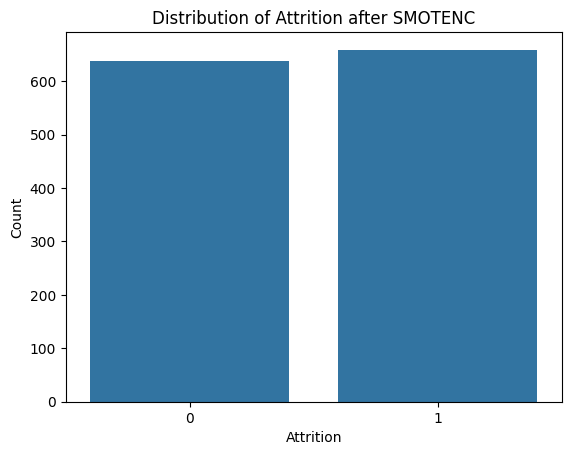

In [19]:

# just to visualize the distribution of target class after SMOTENC

sns.countplot(x=y_train)
plt.title('Distribution of Attrition after SMOTENC')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Age                            1000 non-null   int64 
 1   Gender                         1000 non-null   object
 2   Marital_Status                 1000 non-null   object
 3   Department                     1000 non-null   object
 4   Job_Role                       1000 non-null   object
 5   Job_Level                      1000 non-null   int64 
 6   Monthly_Income                 1000 non-null   int64 
 7   Hourly_Rate                    1000 non-null   int64 
 8   Years_at_Company               1000 non-null   int64 
 9   Years_in_Current_Role          1000 non-null   int64 
 10  Years_Since_Last_Promotion     1000 non-null   int64 
 11  Work_Life_Balance              1000 non-null   int64 
 12  Job_Satisfaction               1000 non-null   int64 
 13  Perf

In [21]:
# BUILD CLASSIFICATION MODEL but with no parameters :(
tree = DecisionTreeClassifier(random_state = 42)
tree.fit(X_train, y_train)

y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       638
           1       1.00      1.00      1.00       659

    accuracy                           1.00      1297
   macro avg       1.00      1.00      1.00      1297
weighted avg       1.00      1.00      1.00      1297


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.77      0.68      0.72       173
           1       0.68      0.78      0.72       152

    accuracy                           0.72       325
   macro avg       0.73      0.73      0.72       325
weighted avg       0.73      0.72      0.72       325



After applying SMOTENC to balance the dataset, the model's performance has improved (F1 score: 0.72).
The model now performs much more balanced across both classes:
- Class 0 (No Attrition): precision = 0.77, recall = 0.68
- Class 1 (Attrition): precision = 0.68, recall = 0.78

# KFold Cross Validation

In [22]:
# Lets split the data into 5 folds.
# We will use this 'kf'(KFold splitting stratergy) object as input to cross_val_score() method
# The folds are made by preserving the percentage of samples for each class.
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# split() method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

Fold:1, Train set: 1297, Test set:325
Fold:2, Train set: 1297, Test set:325
Fold:3, Train set: 1298, Test set:324
Fold:4, Train set: 1298, Test set:324
Fold:5, Train set: 1298, Test set:324


In [23]:
from sklearn.tree import DecisionTreeClassifier

score = cross_val_score(DecisionTreeClassifier(random_state= 42), X, y, cv= kf, scoring="f1")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.72392638 0.73873874 0.65408805 0.72674419 0.72679045]
Average score: 0.71


In [24]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to tune the hyperparameters
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'random_state': [0, 41, 42]
}

dtree_clf = DecisionTreeClassifier() # Initialize a decision tree classifier
grid_search = GridSearchCV(estimator=dtree_clf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='f1') # Use f1 scoring for classification
grid_search.fit(X_train, y_train)

best_dtree_clf = grid_search.best_estimator_ # Get the best estimator from the grid search
y_pred_test = best_dtree_clf.predict(X_test)

print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation f1 score: {:.3f}".format(grid_search.best_score_))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters:  {'criterion': 'entropy', 'max_depth': 7, 'random_state': 42}
Best cross-validation f1 score: 0.721


After applying KFold Cross Validation, the best Decision Tree model achieved a cross-validation F1-score of 0.721, which is approximately the same as the performance obtained using SMOTENC oversampling (F1-score = 0.72).

So we will try using another model.

# Feature Importance

In [25]:
print("Feature importances:\n{}".format(tree.feature_importances_)) #function for feature importance

Feature importances:
[0.0698431  0.00646104 0.01686591 0.0143581  0.01888611 0.02650453
 0.11191599 0.05218895 0.05475256 0.04911885 0.05391186 0.01323868
 0.03723943 0.0357318  0.09188554 0.0118336  0.04071936 0.09434433
 0.07666385 0.00565556 0.0250515  0.00848343 0.05654748 0.02779846]


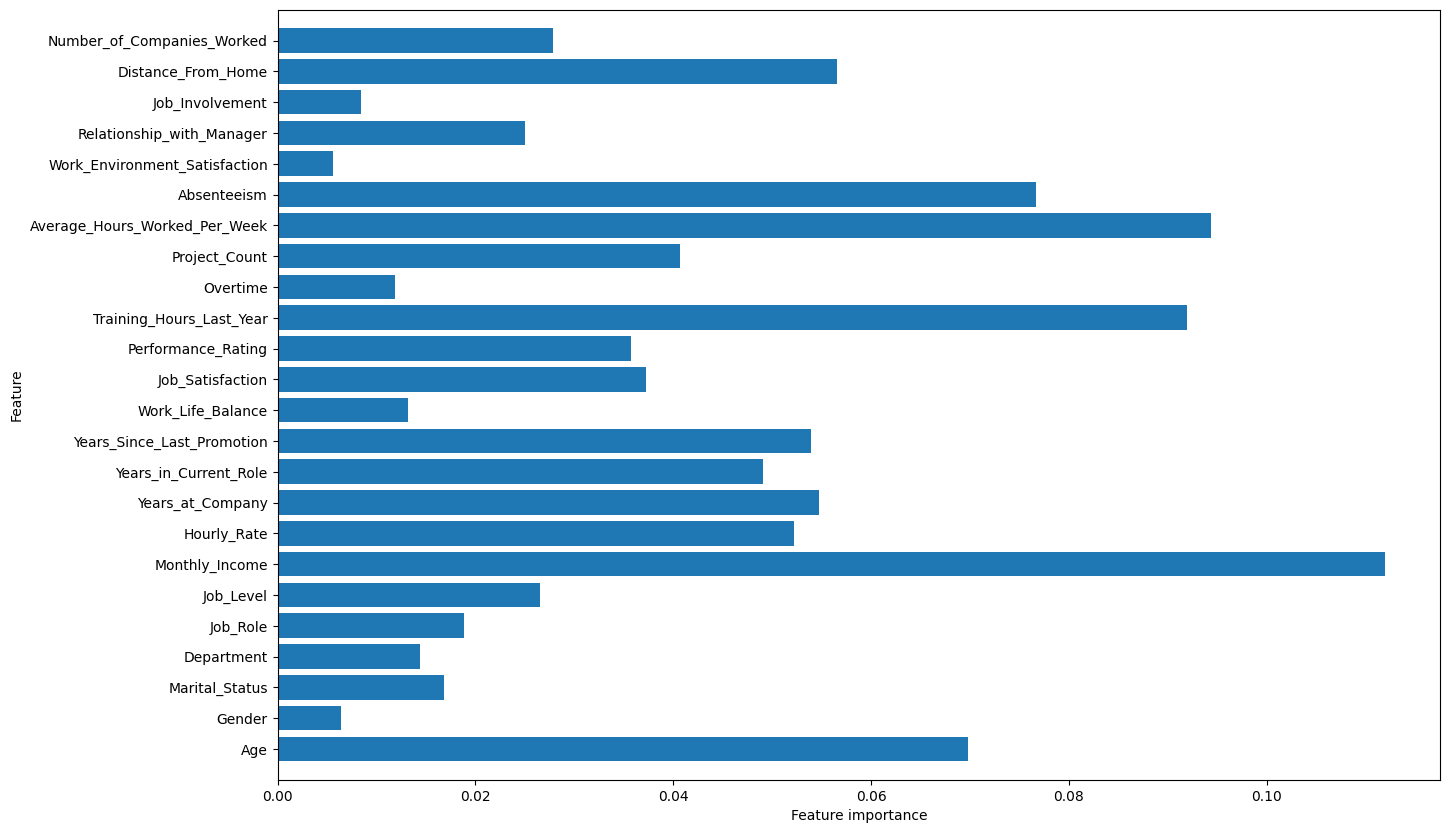

In [26]:
# visualize important features
def plot_feature_importances_attrition(model):
    plt.figure(figsize=(15,10))
    n_features = X_train.shape[1]  # Get the number of features from X_train
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns) # Use column names from X_train as labels
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_attrition(tree)

Semakin tinggi semakin dipakai harusnya

In [27]:
# Show feature importances greater than 0.05
feature_importances = pd.Series(tree.feature_importances_, index=X_train.columns)
important_features = feature_importances[feature_importances > 0.05].sort_values(ascending=False)
important_features

,0
Monthly_Income,0.111916
Average_Hours_Worked_Per_Week,0.094344
Training_Hours_Last_Year,0.091886
Absenteeism,0.076664
Age,0.069843
Distance_From_Home,0.056547
Years_at_Company,0.054753
Years_Since_Last_Promotion,0.053912
Hourly_Rate,0.052189


In [28]:
# using only important features for the prediction
important_features = ["Training_Hours_Last_Year", "Average_Hours_Worked_Per_Week", "Hourly_Rate",
    "Years_at_Company", "Age", "Years_Since_Last_Promotion", "Monthly_Income", "Distance_From_Home", "Absenteeism"]
X_importance = df_encoded[important_features] #input
y_importance = df_encoded['Attrition'] #target

In [29]:
display(X_importance)
display(y_importance)

,Training_Hours_Last_Year,Average_Hours_Worked_Per_Week,Hourly_Rate,Years_at_Company,Age,Years_Since_Last_Promotion,Monthly_Income,Distance_From_Home,Absenteeism
0,14,54,28,15,58,2,15488,20,17
1,6,45,28,6,48,1,13079,25,1
2,77,34,24,24,34,8,13744,45,2
3,49,48,26,10,27,2,6809,35,18
4,64,33,52,29,40,1,10206,44,0
...,...,...,...,...,...,...,...,...,...
995,76,46,76,24,27,3,4172,24,10
996,53,36,71,19,47,0,11007,39,16
997,7,46,43,25,50,3,4641,33,9
998,54,52,92,13,28,0,19855,41,17


,Attrition
0,0
1,0
2,0
3,0
4,0
...,...
995,0
996,1
997,0
998,0


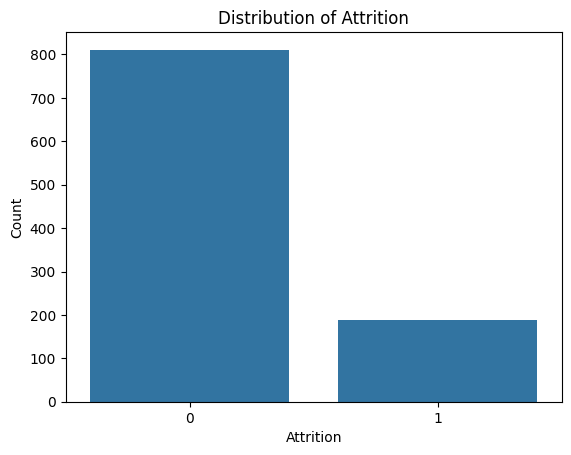

In [30]:
sns.countplot(x=y_importance)
plt.title('Distribution of Attrition')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

The attrition data show a class imbalance between the two target categories. We will use SMOTE oversampling to balance it out.

In [31]:
# oversampling
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_importance, y_importance = smote.fit_resample(X_importance, y_importance)

X_train, X_test, y_train, y_test = train_test_split(X_importance, y_importance, test_size=0.2, random_state=42)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((1297, 9), (325, 9))

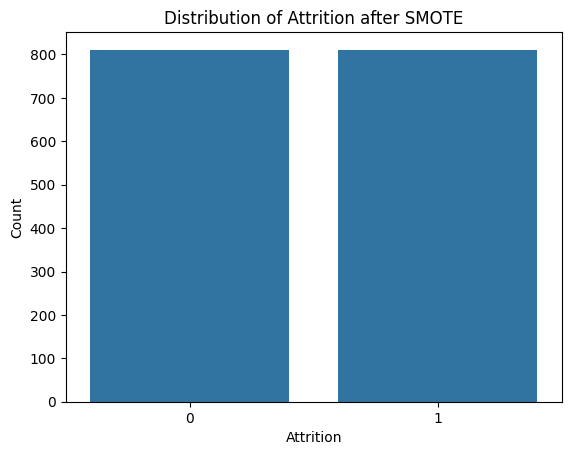

In [32]:
sns.countplot(x=y_importance)
plt.title('Distribution of Attrition after SMOTE')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

In [33]:
X_train_importance, X_test_importance, y_train_importance, y_test_importance = train_test_split(X_importance, y_importance, test_size=0.2, random_state=42)

importance_tree = DecisionTreeClassifier(random_state=42)
importance_tree.fit(X_train_importance, y_train_importance)

y_pred_train_importance = importance_tree.predict(X_train_importance)
y_pred_test_importance = importance_tree.predict(X_test_importance)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train_importance, y_pred_train_importance))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test_importance, y_pred_test_importance))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       638
           1       1.00      1.00      1.00       659

    accuracy                           1.00      1297
   macro avg       1.00      1.00      1.00      1297
weighted avg       1.00      1.00      1.00      1297


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.76      0.68      0.72       173
           1       0.67      0.76      0.71       152

    accuracy                           0.71       325
   macro avg       0.72      0.72      0.71       325
weighted avg       0.72      0.71      0.71       325



- Class 0 (No Attrition): precision = 0.76, recall = 0.68, F1 = 0.72
- Class 1 (Attrition): precision = 0.67, recall = 0.76, F1 = 0.71

Compared to the previous model (F1 Score: 0.72 with SMOTENC and KFold Cross Validation), this one achieves an F1-score of 0.71, which is slightly lower, but still within a similar range.

# Hyperparameter Tuning using Grid Search

In [34]:
# Define the parameter grid to tune the hyperparameters
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'random_state': [0, 41, 42]
}

dtree_clf = DecisionTreeClassifier() # Initialize a decision tree classifier
grid_search = GridSearchCV(estimator=dtree_clf, param_grid=param_grid,
                          n_jobs=-1, verbose=2, scoring='f1') # Use f1 scoring for classification
grid_search.fit(X_train_res, y_train_res)

best_dtree_clf = grid_search.best_estimator_ # Get the best estimator from the grid search
y_pred_test = best_dtree_clf.predict(X_test)

print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation f1 score: {:.3f}".format(grid_search.best_score_))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters:  {'criterion': 'entropy', 'max_depth': 8, 'random_state': 0}
Best cross-validation f1 score: 0.731


Using GridSearch we got F1-score of 0.731.
This represents a slight improvement over the previous model, indicating that hyperparameter tuning successfully increases the model's balance between precision and recall while maintaining generalization.

# Selecting Predictors/Features Based on Correlation

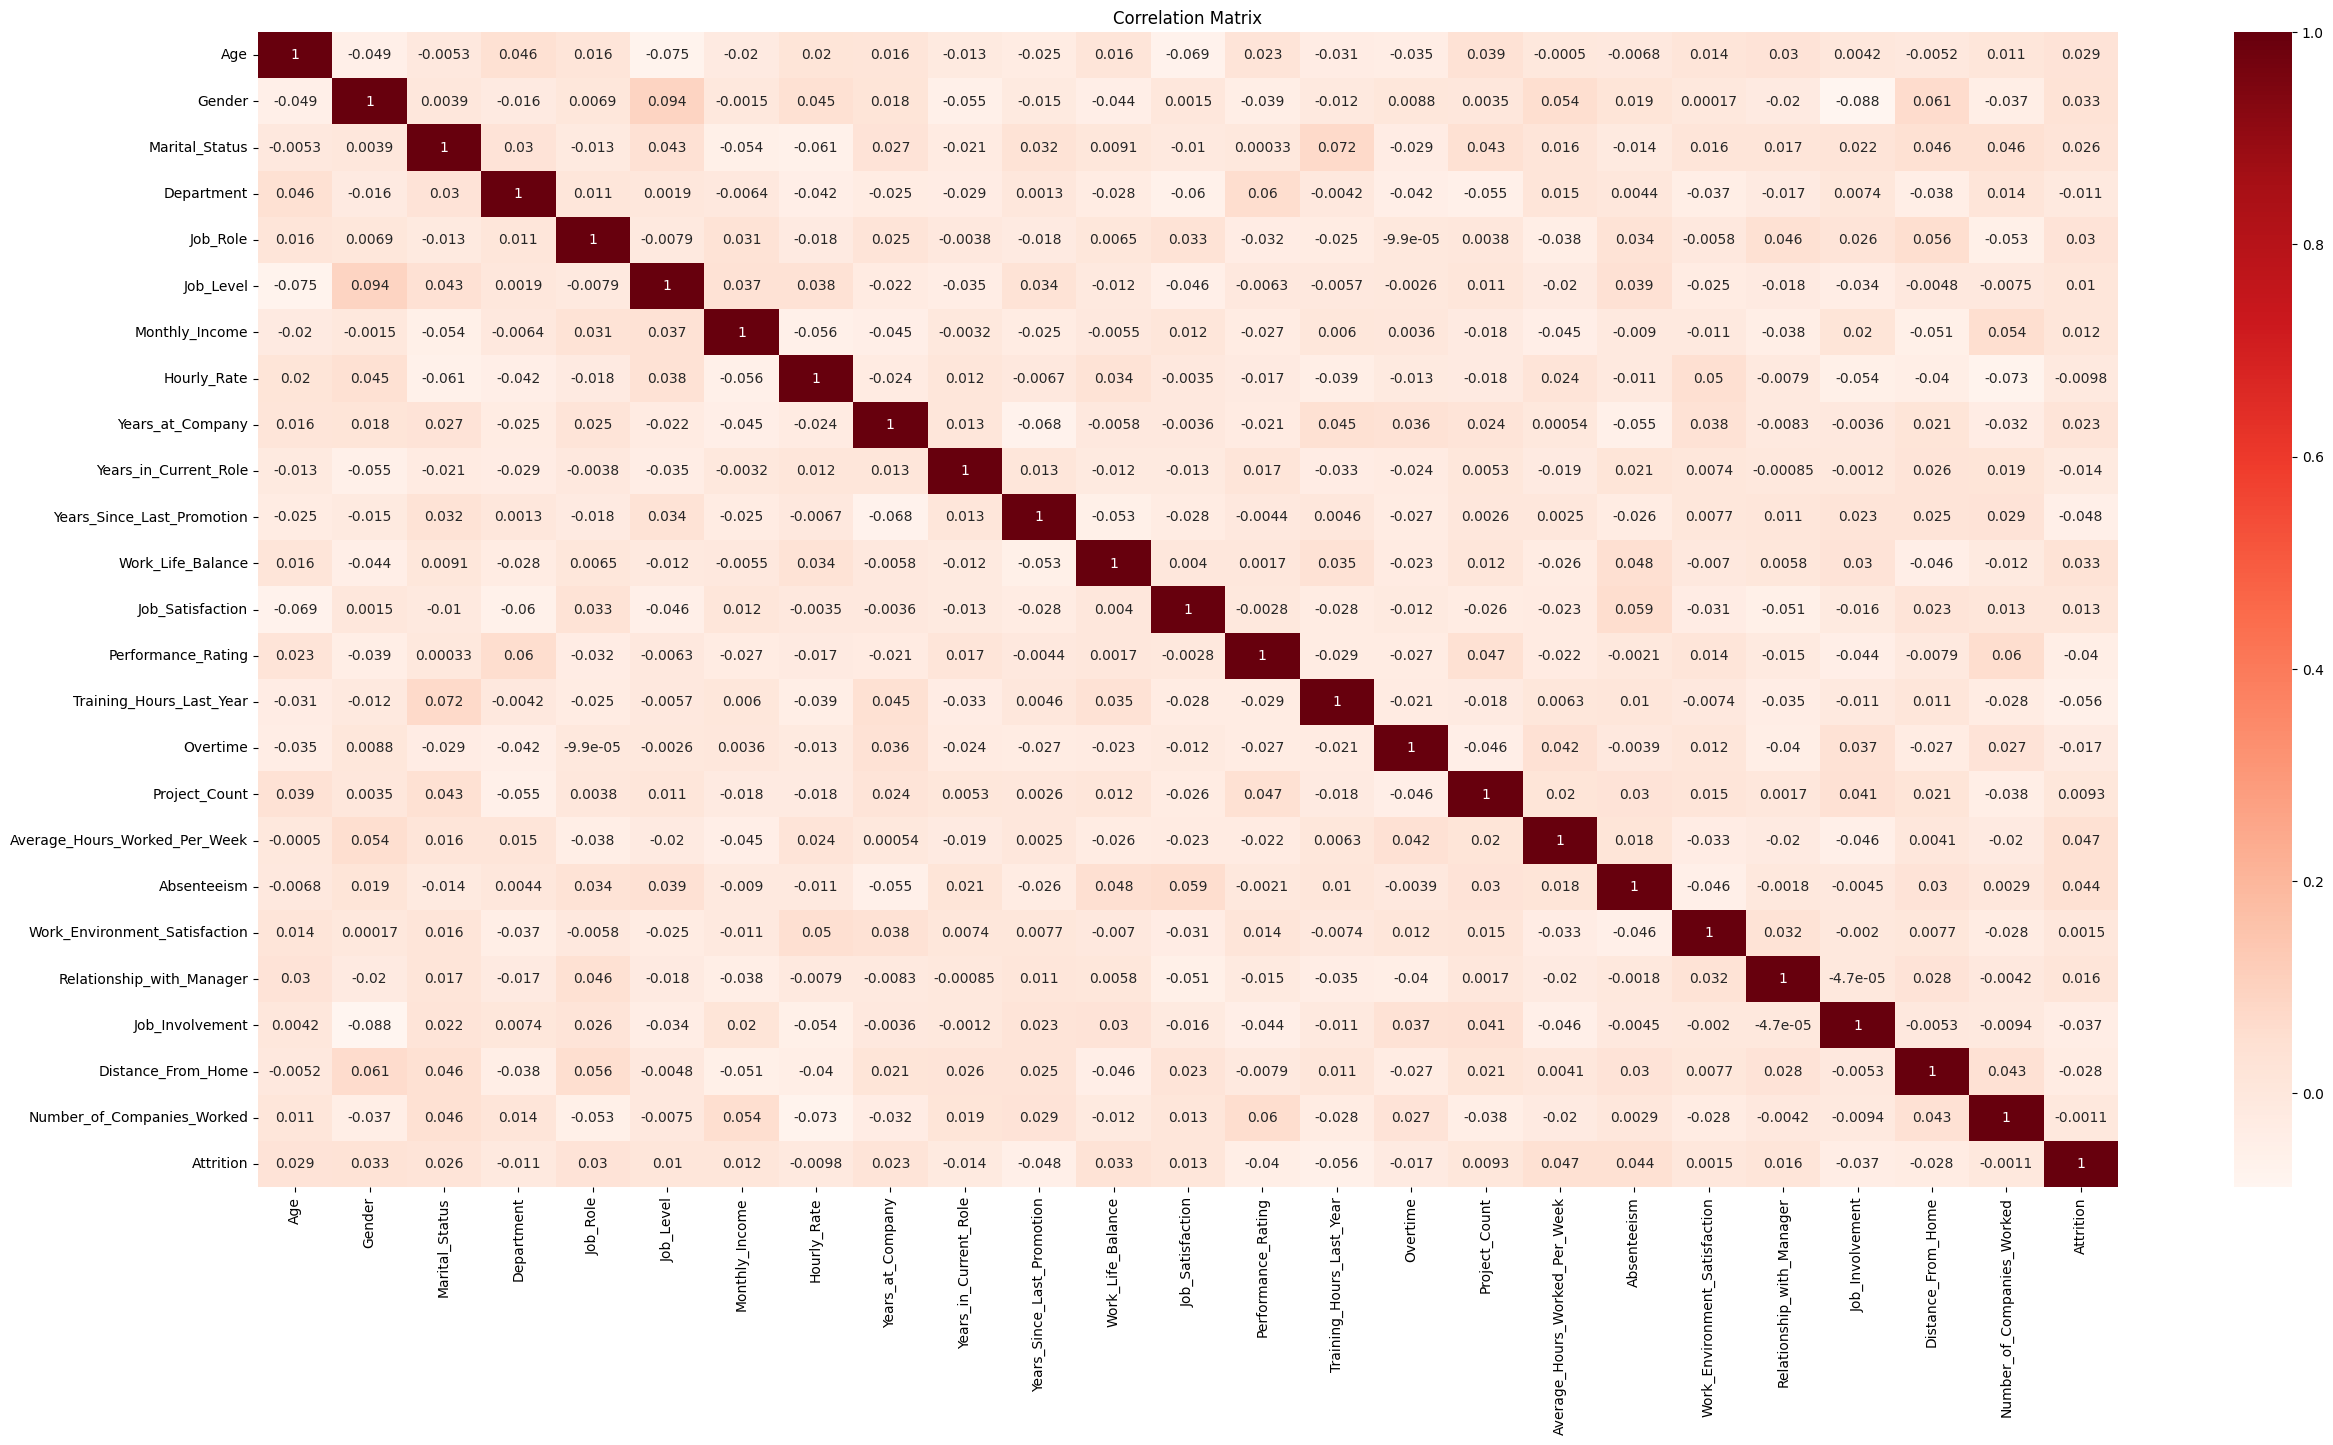

In [43]:
# show heatmap
plt.figure(figsize=(30, 15))
sns.heatmap(df_encoded.corr(), annot=True, cmap="Reds")
plt.title('Correlation Matrix')
plt.show()

We will not be using this model, because from the heatmap we can see that there are no strong correlation relationship between any of the features. This indicates that the input variables may not provide clear separation between the classes (“Yes” and “No”).

In [44]:
# Comparison data
data = {
    'Model': [
        'Decision Tree (without SMOTENC)',
        'SMOTENC Oversampling',
        'K-Fold Cross Validation',
        'GridSearchCV',
        'Feature Importance'
    ],
    'F1-Score (Test Set)': [0.55, 0.72, 0.72, 0.73, 0.71]
}

df_comparison = pd.DataFrame(data)

print("Comparison between models")
df_comparison

Comparison between models


,Model,F1-Score (Test Set)
0,Decision Tree (without SMOTENC),0.55
1,SMOTENC Oversampling,0.72
2,K-Fold Cross Validation,0.72
3,GridSearchCV,0.73
4,Feature Importance,0.71


Overall, the model with GridSearchCV (F1 = 0.73) performs best, but the difference from SMOTENC + K-Fold (F1 = 0.72) is minor.

This suggests that: The Decision Tree model has reached its performance limit on this dataset.